## Load Data Set

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
from keras.datasets import cifar100
from keras.utils import to_categorical
import numpy as np
import cv2
import os
from keras import backend as K

In [3]:
(x_train, y_train_), (x_test, y_test_) = cifar100.load_data()


169009152/169001437 [==============================] - 6s 0us/step


In [4]:
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

In [5]:
y_train = to_categorical(y_train_)
y_test = to_categorical(y_test_)

## Inception V2 model

In [6]:
import keras
import tensorflow as tf
from keras.models import Model
from keras.layers import Dense, Activation, Dropout, Flatten, Reshape
from keras.layers import Conv2D, Input
from keras.layers import MaxPooling2D, BatchNormalization
from keras.callbacks import EarlyStopping
from keras.layers.merge import concatenate
import os

In [7]:
input_shape = (32, 32, 3)
input = Input(shape=input_shape)

In [8]:
layer1_1 = Conv2D(64, (1, 1), activation='elu', padding='same')(input)
layer1_2 = Conv2D(96, (1, 1), activation='elu', padding='same')(input)
layer1_2 = Conv2D(128, (3, 3), activation='elu', padding='same')(layer1_2)
layer1_3 = Conv2D(16, (1, 1), activation='elu', padding='same')(input)
layer1_3 = Conv2D(32, (5, 5), activation='elu', padding='same')(layer1_3)
layer1_4 = MaxPooling2D(pool_size=(3, 3), strides=(1, 1), padding='same', data_format='channels_last')(input)
layer1_4 = Conv2D(32, (1, 1), activation='elu', padding='same')(layer1_4)
 
concat = concatenate([layer1_1, layer1_2, layer1_3, layer1_4])
concat = BatchNormalization()(concat)
concat = Activation('elu')(concat)

In [9]:
layer2_1 = Conv2D(64, (1, 1), activation='elu', padding='same')(concat)
layer2_2 = Conv2D(96, (1, 1), activation='elu', padding='same')(concat)
layer2_2 = Conv2D(128, (3, 3), activation='elu', padding='same')(layer2_2)
layer2_3 = Conv2D(16, (1, 1), activation='elu', padding='same')(concat)
layer2_3 = Conv2D(32, (5, 5), activation='elu', padding='same')(layer2_3)
layer2_4 = MaxPooling2D(pool_size=(3, 3), strides=(1, 1), padding='same', data_format='channels_last')(concat)
layer2_4 = Conv2D(32, (1, 1), activation='elu', padding='same')(layer2_4)

concat2 = concatenate([layer2_1, layer2_2, layer2_3, layer2_4])
concat2 = BatchNormalization()(concat2)
concat2 = Activation('elu')(concat2)

In [10]:
# layer3_1 = Conv2D(64, (1, 1), activation='elu', padding='same')(concat2)
# layer3_2 = Conv2D(96, (1, 1), activation='elu', padding='same')(concat2)
# layer3_2 = Conv2D(128, (3, 3), activation='elu', padding='same')(layer3_2)
# layer3_3 = Conv2D(16, (1, 1), activation='elu', padding='same')(concat2)
# layer3_3 = Conv2D(32, (5, 5), activation='elu', padding='same')(layer3_3)
# layer3_4 = MaxPooling2D(pool_size=(3, 3), strides=(1, 1), padding='same', data_format='channels_last')(concat2)
# layer3_4 = Conv2D(32, (1, 1), activation='elu', padding='same')(layer3_4)

# concat3 = concatenate([layer3_1, layer3_2, layer3_3, layer3_4])
# concat3 = BatchNormalization()(concat3)
# concat3 = Activation('elu')(concat3)

In [11]:
# layer4_1 = Conv2D(64, (1, 1), activation='elu', padding='same')(concat3)
# layer4_2 = Conv2D(96, (1, 1), activation='elu', padding='same')(concat3)
# layer4_2 = Conv2D(128, (3, 3), activation='elu', padding='same')(layer4_2)
# layer4_3 = Conv2D(16, (1, 1), activation='elu', padding='same')(concat3)
# layer4_3 = Conv2D(32, (5, 5), activation='elu', padding='same')(layer4_3)
# layer4_4 = MaxPooling2D(pool_size=(3, 3), strides=(1, 1), padding='same', data_format='channels_last')(concat3)
# layer4_4 = Conv2D(32, (1, 1), activation='elu', padding='same')(layer4_4)

# concat4 = concatenate([layer4_1, layer4_2, layer4_3, layer4_4])
# concat4 = BatchNormalization()(concat4)
# concat4 = Activation('elu')(concat4)

output = Conv2D(8, (3, 3), activation=tf.keras.layers.LeakyReLU(alpha=0.3), padding='same')(concat2)
output = MaxPooling2D(pool_size=(3, 3))(output)
output = Flatten()(output)                 
output = Dense(100, activation='softmax')(output) 

model = Model(inputs=input, outputs=output) 
model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 32, 32, 96)   384         input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_3 (Conv2D)               (None, 32, 32, 16)   64          input_1[0][0]                    
__________________________________________________________________________________________________
max_pooling2d (MaxPooling2D)    (None, 32, 32, 3)    0           input_1[0][0]                    
_______________________________________________________________________________________

In [12]:
opt = keras.optimizers.SGD(learning_rate=0.01, clipnorm=5)
model.compile(loss=keras.losses.categorical_crossentropy, optimizer=opt, metrics=["accuracy"])
callback = EarlyStopping(monitor='val_loss', patience=20)
history = model.fit(x_train, y_train, batch_size=128, epochs=200, verbose=1, validation_data=(x_test, y_test), callbacks=[callback])
model.save_weights(filepath=F"/content/gdrive/My Drive/Checkpoints/InceptionV2_SGD_BatchNormalization.h5")

Epoch 1/200
391/391 [==============================] - 16s 40ms/step - loss: 4.3246 - accuracy: 0.0542 - val_loss: 4.2056 - val_accuracy: 0.0594
Epoch 2/200
391/391 [==============================] - 15s 39ms/step - loss: 3.7688 - accuracy: 0.1315 - val_loss: 3.7049 - val_accuracy: 0.1376
Epoch 3/200
391/391 [==============================] - 15s 39ms/step - loss: 3.4595 - accuracy: 0.1824 - val_loss: 3.6072 - val_accuracy: 0.1626
Epoch 4/200
391/391 [==============================] - 15s 39ms/step - loss: 3.2461 - accuracy: 0.2208 - val_loss: 3.2579 - val_accuracy: 0.2211
Epoch 5/200
391/391 [==============================] - 15s 39ms/step - loss: 3.1020 - accuracy: 0.2477 - val_loss: 3.2469 - val_accuracy: 0.2223
Epoch 6/200
391/391 [==============================] - 15s 39ms/step - loss: 2.9770 - accuracy: 0.2726 - val_loss: 3.1608 - val_accuracy: 0.2479
Epoch 7/200
391/391 [==============================] - 15s 39ms/step - loss: 2.8786 - accuracy: 0.2925 - val_loss: 3.1361 - val_ac

## Test Metrics

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


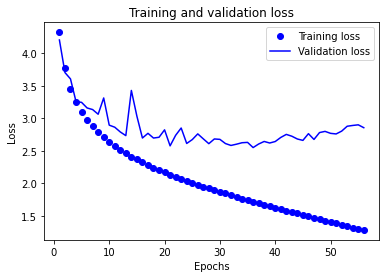

In [13]:
import matplotlib.pyplot as plt

history_dict = history.history
print(history_dict.keys())
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(history_dict['accuracy']) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [14]:
y_pred = model.predict(x_test).argmax(-1)
import sklearn.metrics as metrics
print(metrics.classification_report(y_test.argmax(axis=1), y_pred))

              precision    recall  f1-score   support

           0       0.59      0.70      0.64       100
           1       0.50      0.48      0.49       100
           2       0.20      0.14      0.16       100
           3       0.13      0.13      0.13       100
           4       0.22      0.20      0.21       100
           5       0.37      0.31      0.34       100
           6       0.42      0.45      0.43       100
           7       0.36      0.44      0.40       100
           8       0.69      0.41      0.52       100
           9       0.53      0.55      0.54       100
          10       0.25      0.28      0.26       100
          11       0.21      0.23      0.22       100
          12       0.36      0.35      0.36       100
          13       0.34      0.38      0.36       100
          14       0.26      0.25      0.26       100
          15       0.32      0.28      0.30       100
          16       0.34      0.36      0.35       100
          17       0.59    

In [15]:
# model.load_weights(filepath=F"/content/gdrive/My Drive/Checkpoints/InceptionV2_SGD_BatchNormalization.h5")

model.load_weights("InceptionV2_SGD_BatchNormalization.h5")

In [16]:
result = model.evaluate(batch_size=128, x=x_test, y=y_test)
dict(zip(model.metrics_names,result))

79/79 [==============================] - 1s 14ms/step - loss: 2.8572 - accuracy: 0.3667


{'accuracy': 0.3666999936103821, 'loss': 2.8572497367858887}